[generator zbiorów uczących](https://editor.p5js.org/tomgrad/present/HMQm5flEA)

In [1]:
%pylab inline
# import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Linear:
    '''Warstwa liniowa - f(x)=Wx+b'''
    def __init__(self, inputs, outputs):
        '''
        inputs - liczba cech
        outputs - liczba klas
        '''
        self.b=np.zeros(outputs)
        self.w=2*np.random.rand(outputs, inputs)-1
    def forward(self, x):
        self.x=x
        return self.w@x+self.b
    def backward(self, grad):
        self.grad_w=np.outer(grad, self.x)
        self.grad_b=grad
        return grad@self.w
    def learn(self, learning_rate):
        self.w -= self.grad_w * learning_rate
        self.b -= self.grad_b * learning_rate        

In [3]:
class Softmax:
    '''Funkcja aktywacji zwracająca prawdopodobieństwa - znormalizowane wartości e^x'''
    def forward(self, x):
        x=np.exp(x)
        self.y=x/np.sum(x)
        return self.y
    def backward(self, grad):
        return grad*self.y*(1-self.y)

In [22]:
class CrossEntropyLoss:
    '''Funkcja straty - entropia krzyżowa'''
    def __call__(self, prob, correct):
        '''
        prob - wektor prawdopodobieństw
        correct - indeks właściwej klasy
        '''
        grad=np.zeros(prob.shape)
        grad[correct] = -1/prob[correct]
        return -np.log(prob[correct]), grad

In [14]:
class LinearClassifier:
    '''Klasyfikator liniowy'''
    def __init__(self, inputs, outputs):
        '''
        inputs - liczba cech
        outputs - liczba klas
        '''        
        self.l=Linear(inputs, outputs)
        self.s=Softmax()
        self.loss=CrossEntropyLoss()
    def forward(self, x):
        x=self.l.forward(x)
        x=self.s.forward(x)
        return x
    def train(self, X, Y, learning_rate):
        '''
        SGD epoch
        X, Y - zestaw uczący (cechy, klasy)
        learning_rate - szybkość uczenia
        '''
        order_list=[i for i in range(len(Y))]
        np.random.shuffle(order_list)
        total_loss=0
        for i in order_list:
            x=self.forward(X[i])
            loss, grad = self.loss(x, Y[i])
            total_loss+=loss
            grad=self.s.backward(grad)
            self.l.backward(grad)
            self.l.learn(learning_rate)
        return total_loss

In [155]:
data=loadtxt('nonlin01.txt')
X, Y = data[:,1:], data[:,0].astype('int')

In [156]:
model=LinearClassifier(2, max(Y)+1)

In [139]:
epochs=[]

In [148]:
for i in range(1000):
    epochs.append(model.train(X,Y, 1))

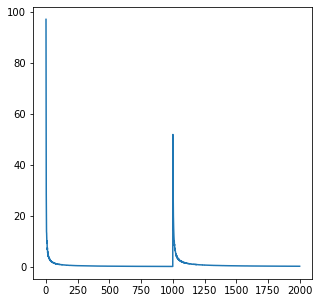

In [149]:
plot(epochs)

In [150]:
model.train(X,Y, 0.1)

0.19010506527604124

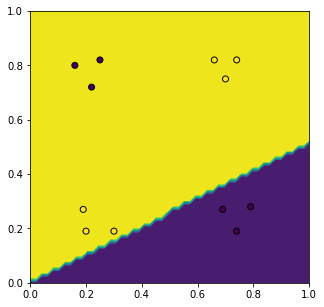

In [157]:
n=50 # rozdzielczość
z=zeros((n,n))
x=linspace(0,1,n)
for i in range(n):
    for j in range(n):
        z[i,j]=np.argmax(model.forward([x[j], x[i]]))
figsize(5,5)
contourf(x,x,z, vmin=0, vmax=max(Y));
scatter(X[:,0], X[:,1], c=Y, edgecolors=(0,0,0))

In [136]:
[model.forward(x) for x in X]

[array([9.99952968e-01, 4.59439205e-05, 1.08729154e-06, 4.01204192e-10]),
 array([9.93688324e-01, 6.31022841e-03, 1.42114682e-06, 2.68448144e-08]),
 array([9.82427413e-01, 1.12816835e-02, 6.26516197e-03, 2.57413806e-05]),
 array([8.23013477e-06, 9.99898957e-01, 4.26552824e-08, 9.27699840e-05]),
 array([1.31401724e-08, 9.99580652e-01, 2.42979413e-09, 4.19332146e-04]),
 array([3.35612189e-07, 9.78649612e-01, 4.97439959e-06, 2.13450782e-02]),
 array([2.29514949e-04, 2.86930537e-07, 9.99742744e-01, 2.74544121e-05]),
 array([1.11435108e-07, 7.13499613e-10, 9.99983166e-01, 1.67221260e-05]),
 array([5.57384671e-10, 1.71259421e-07, 9.70885689e-01, 2.91141396e-02]),
 array([3.21175166e-10, 7.50411225e-04, 8.62585024e-03, 9.90623738e-01]),
 array([1.71127814e-12, 8.48855149e-05, 1.73063099e-03, 9.98184483e-01]),
 array([1.72895626e-13, 2.17978300e-06, 1.50405208e-02, 9.84957299e-01])]

In [154]:
model.l.w.shape

(5, 2)